<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
#Task 1: Become familiar with the dataset
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

<AxesSubplot:ylabel='MEDV'>

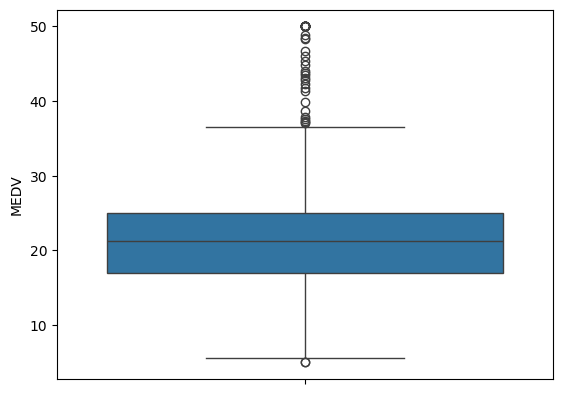

In [57]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:

#For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(data=boston_df.MEDV)

<AxesSubplot:ylabel='CHAS'>

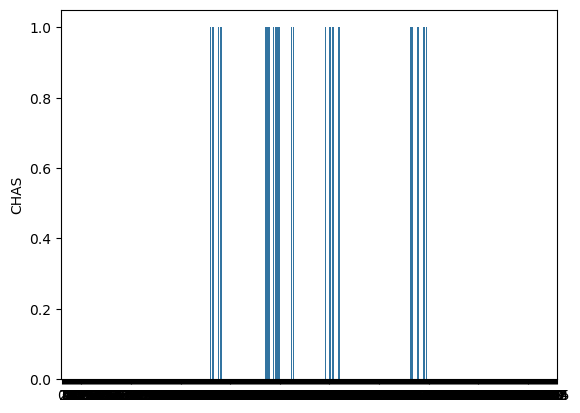

In [56]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:

#Provide a  bar plot for the Charles river variable

#ax = sns.barplot(column="CHAS", data=boston_df)
#plt.show()

sns.barplot(data=boston_df.CHAS)

<AxesSubplot:xlabel='AGE_Group', ylabel='MEDV'>

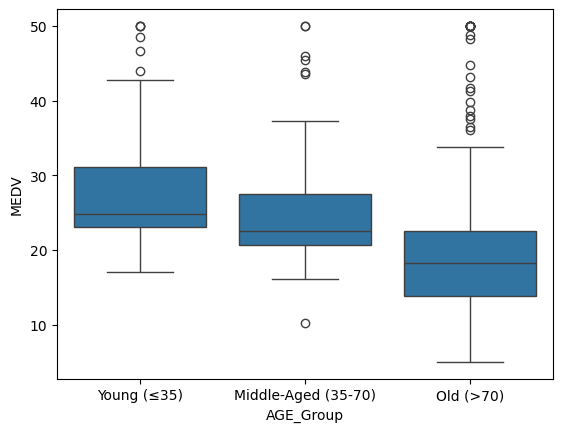

In [63]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:

#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

bins = [0, 35, 70, 100]  # Define cutoff points for age groups
labels = ["Young (≤35)", "Middle-Aged (35-70)", "Old (>70)"]

boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True)

sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

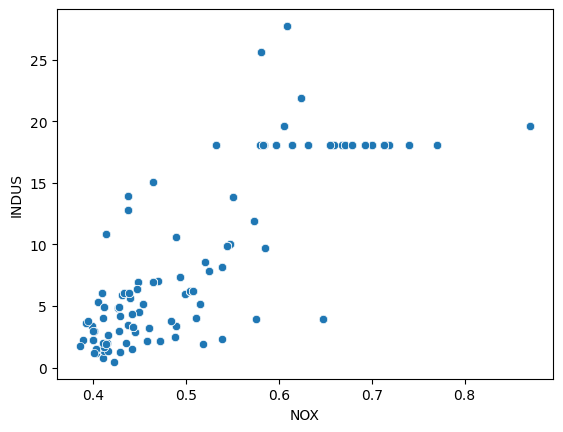

In [68]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:

#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

#The scatter plot helps in identifying whether there is a positive or negative correlation between NOX and INDUS.

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

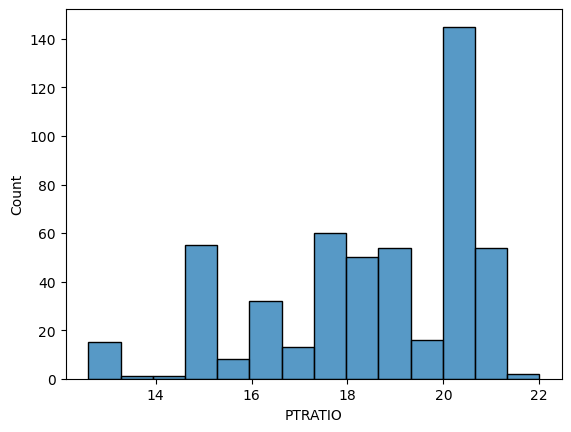

In [65]:
#Task 2: Generate Descriptive Statistics and Visualizations
#For all visualizations, please include a title in each graph and appropriate labels
#Generate the following and explain your findings:

#Create a histogram for the pupil to teacher ratio variable

sns.histplot(data=boston_df.PTRATIO)


In [71]:
#Task 3: Use the appropriate tests to answer the questions provided.
#For each of the following questions;

#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Be sure to:
 #State your hypothesis.
 #Use α = 0.05
 #Perform the test Statistics.
 #State the conclusion from the test.


import scipy.stats as stats

medv_river = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Perform an independent samples T-test
t_stat, p_value = stats.ttest_ind(medv_river, medv_no_river, equal_var=False)  # Welch’s T-test

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values between houses near and not near the river.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median home values between the two groups.")

T-statistic: 3.1133
P-value: 0.0036
Reject the null hypothesis: There is a significant difference in median home values between houses near and not near the river.


In [72]:
#Task 3: Use the appropriate tests to answer the questions provided.
#For each of the following questions;

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#Be sure to:
 #State your hypothesis.
 #Use α = 0.05
 #Perform the test Statistics.
 #State the conclusion from the test.

import scipy.stats as stats
import pandas as pd

# Define bin edges and labels
bins = [0, 35, 70, 100]  # Age groups
labels = ["Young (≤35)", "Middle-Aged (35-70)", "Old (>70)"]

# Categorize AGE into bins
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, right=True)

# Split MEDV into groups based on AGE_Group
medv_young = boston_df[boston_df["AGE_Group"] == "Young (≤35)"]["MEDV"]
medv_middle = boston_df[boston_df["AGE_Group"] == "Middle-Aged (35-70)"]["MEDV"]
medv_old = boston_df[boston_df["AGE_Group"] == "Old (>70)"]["MEDV"]

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(medv_young, medv_middle, medv_old)

# Display results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values between at least one of the AGE groups.")
else:
        print("Fail to reject the null hypothesis: There is no significant difference in median home values across AGE groups.")

F-statistic: 36.4076
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median home values between at least one of the AGE groups.


In [73]:
#Task 3: Use the appropriate tests to answer the questions provided.
#For each of the following questions;

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#Be sure to:
 #State your hypothesis.
 #Use α = 0.05
 #Perform the test Statistics.
 #State the conclusion from the test.

import scipy.stats as stats

# Perform Pearson correlation test
corr_coef, p_value = stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

# Display results
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between NOX and INDUS.")


Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


In [ ]:
#Task 3: Use the appropriate tests to answer the questions provided.
#For each of the following questions;

#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#Be sure to:
 #State your hypothesis.
 #Use α = 0.05
 #Perform the test Statistics.
 #State the conclusion from the test.